In [35]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt

In [36]:
data = pd.DataFrame(data=[4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4], columns=['y'])
data['N'] = 8

Sequential sampling (1 chains in 1 job)
Metropolis: [p_interval__]
100%|██████████| 10500/10500 [00:01<00:00, 7398.50it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


       mean        sd  mc_error  hpd_2.5  hpd_97.5
p  0.456253  0.039406  0.000936  0.38711  0.538006


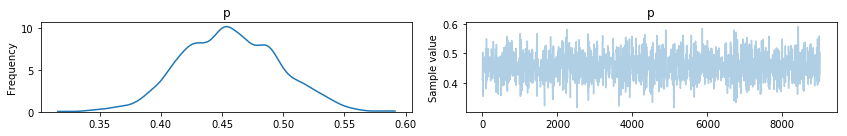

In [37]:
with pm.Model() as model:
    p = pm.Uniform("p", 0, 1) 
    obs = pm.Binomial("obs", n=data['N'], p=p, observed=data['y']) 
    step = pm.Metropolis() 
    trace = pm.sample(10000, step=step, njobs=2, chains=1)
    trace_result = trace[1000:]
print(pm.summary(trace_result))
pm.traceplot(trace_result)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10958e9b0>]],
      dtype=object)

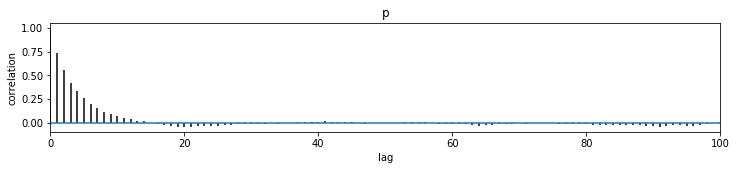

In [38]:
pm.plots.autocorrplot(trace_result)

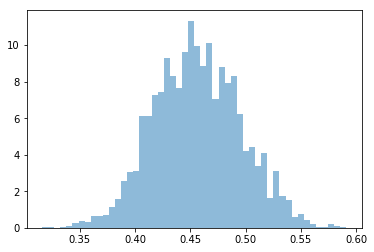

In [39]:
plt.hist(trace_result['p'], bins=50, histtype="stepfilled", normed=True, alpha=0.5)
plt.show()

In [40]:
# 中央値
print(np.mean(trace_result['p']))

0.4562533779741527


In [41]:
# 95%信用区間
print(np.percentile(trace_result['p'], 2.5))
print(np.percentile(trace_result['p'], 97.5))

0.3829984577434779
0.5352511898885525


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b94a438>,
      dtype=object)

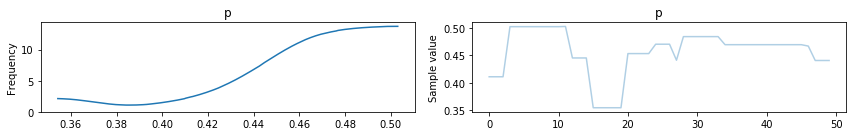

In [42]:
pm.traceplot(trace_result[:50])